# Marina Selber Cekannauskas

## Research question/interest

The dataset provides an insight on the concept of masculinity through the lens 
of the modern men . As a female student in DataScience - a male dominant field-
I would like to analyse questions such as how important it is for men to be seen by outsiders as  masculine,  what are some of the insights on  what  they considered advantages and disadvantages of being a men in the job market.


In [1]:
import pandas as pd

In [79]:
df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/masculinity-survey/raw-responses.csv")
df

,Unnamed: 0,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,...,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,...,Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
1,2,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
2,3,5/10/18 7:02,5/10/18 7:09,Very masculine,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.515746
3,4,5/10/18 7:27,5/10/18 7:31,Very masculine,Not too important,Father or father figure(s),Mother or mother figure(s),Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,Some college,Some college,65 and up,Has children,No answer,0.600640
4,5,5/10/18 7:35,5/10/18 7:42,Very masculine,Very important,Not selected,Not selected,Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,1611,5/22/18 8:48,5/22/18 8:52,Not very masculine,Not at all important,Father or father figure(s),Mother or mother figure(s),Other family members,Pop culture,Friends,...,West North Central,iOS Phone / Tablet,White,White,Some college,Some college,18 - 34,No children,Straight,2.891038
1611,1612,5/22/18 9:15,5/22/18 9:24,Very masculine,Very important,Father or father figure(s),Not selected,Other family members,Not selected,Not selected,...,NaN,iOS Phone / Tablet,Non-white,Hispanic,High school or less,High school or less,35 - 64,Has children,Straight,8.643674
1612,1613,5/22/18 9:22,5/22/18 9:39,Somewhat masculine,Somewhat important,Not selected,Mother or mother figure(s),Not selected,Not selected,Not selected,...,South Atlantic,Windows Desktop / Laptop,White,White,Some college,Some college,35 - 64,Has children,Straight,2.340241
1613,1614,5/22/18 9:44,5/22/18 9:50,Somewhat masculine,Somewhat important,Not selected,Mother or mother figure(s),Not selected,Not selected,Not selected,...,Mountain,Windows Desktop / Laptop,White,White,High school or less,High school or less,18 - 34,No children,Straight,6.557984


# Task 1 : EDA 

In [371]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

print("Number of rows and columns respectively:", df.shape)


Number of rows and columns respectively: (1615, 98)


#### Based on the frequency table below  , it is possible to understand most common answers for survey questions as well as demographic categories  

In [372]:
df.describe(include='object').T

,count,unique,top,freq
StartDate,1615,1378,5/21/18 12:36,4
EndDate,1615,1377,5/17/18 4:41,4
q0001,1615,5,Somewhat masculine,826
q0002,1615,5,Somewhat important,628
q0004_0001,1615,2,Father or father figure(s),1109
...,...,...,...,...
educ3,1615,3,College or more,997
educ4,1615,4,College or more,515
age3,1615,3,35 - 64,855
kids,1606,2,Has children,1065


#### Our survey is based mostly on categorical variables. The numerical variable "weight" is the only varible that allows for an overview of data with an approach in statistics .

In [373]:
df.dtypes

Unnamed: 0       int64
StartDate       object
EndDate         object
q0001           object
q0002           object
                ...   
educ4           object
age3            object
kids            object
orientation     object
weight         float64
Length: 98, dtype: object

In [374]:
df.describe(include='float64').T

,count,mean,std,min,25%,50%,75%,max
weight,1615.0,1.0,1.438996,0.019744,0.10258,0.596892,1.010046,8.676606


#### Before cleaning the data , I wanted to understand the meaning for the  first four columns : how long it took for each participant to answer each question . Note on dropping the "Unnamed" column since it is unnecessary 

In [375]:
df[df.columns[0:3]]

,Unnamed: 0,StartDate,EndDate
0,1,5/10/18 4:01,5/10/18 4:06
1,2,5/10/18 6:30,5/10/18 6:53
2,3,5/10/18 7:02,5/10/18 7:09
3,4,5/10/18 7:27,5/10/18 7:31
4,5,5/10/18 7:35,5/10/18 7:42
...,...,...,...
1610,1611,5/22/18 8:48,5/22/18 8:52
1611,1612,5/22/18 9:15,5/22/18 9:24
1612,1613,5/22/18 9:22,5/22/18 9:39
1613,1614,5/22/18 9:44,5/22/18 9:50


 Analyzing the columns I realized questions on the survey were substituted with "q00x" , it would be possible to rename columns . However , in this survey some questions ( such as question 4 and question 8 for example ) had multiple answers . When loading the table , some columns were created to fit such options . Therefore , q004_001, q0004_0002,q0004_0003,q0004_0004 are all part of question 4 for example.

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 98 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1615 non-null   int64  
 1   StartDate    1615 non-null   object 
 2   EndDate      1615 non-null   object 
 3   q0001        1615 non-null   object 
 4   q0002        1615 non-null   object 
 5   q0004_0001   1615 non-null   object 
 6   q0004_0002   1615 non-null   object 
 7   q0004_0003   1615 non-null   object 
 8   q0004_0004   1615 non-null   object 
 9   q0004_0005   1615 non-null   object 
 10  q0004_0006   1615 non-null   object 
 11  q0005        1615 non-null   object 
 12  q0007_0001   1615 non-null   object 
 13  q0007_0002   1615 non-null   object 
 14  q0007_0003   1615 non-null   object 
 15  q0007_0004   1615 non-null   object 
 16  q0007_0005   1615 non-null   object 
 17  q0007_0006   1615 non-null   object 
 18  q0007_0007   1615 non-null   object 
 19  q0007_

In [101]:
df['q0001'].value_counts()

Somewhat masculine      826
Very masculine          612
Not very masculine      131
Not at all masculine     32
No answer                14
Name: q0001, dtype: int64

In [102]:
df['q0011_0001'].value_counts()

Not selected                               700
Managers want to hire and promote women    180
Name: q0011_0001, dtype: int64

In [8]:
print(df.isnull().values.sum())

20455


# Task 2 - 3

My goal is to analyse a possible relationship between the importance of being seen as masculine with behavior in the workplace . Firstly , how important is it for men to be seen as masculine ?  Secondly, what are considered to be the advantages of being a men in the workplace ? The disadvantages ?   
 

#### First , I selected the columns I wanted to answer such question and dropped the others 
**Question 10** :  In which of the following ways would you say it’s an ​advantage​ to be a man at
your work right now? 
- q0010_0001 : Men make more money 
- q0010_0002 : Men are taken more serioulsy 
- q0010_0003 : Men have more choice 
- q00010_0004: Men have more promotion/professional development opportunities 
- q00010_0005: Men are explicitly praised more often
- q00010_0004: Men generally have more support from their managers
- q00010_0004:Other (please specify)
- q00010_0004:None of the above

In [3]:
df = df[['q0002','q0010_0001','q0010_0002','q0010_0003','q0010_0004','q0010_0005','q0010_0006','q0010_0007','q0010_0008']]
df                                                           

,q0002,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008
0,Somewhat important,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Somewhat important,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Not too important,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected
3,Not too important,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Very important,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected
...,...,...,...,...,...,...,...,...,...
1610,Not at all important,Men make more money,Men are taken more seriously,Men have more choice,Men have more promotion/professional developme...,Men are explicitly praised more often,Men generally have more support from their man...,Not selected,Not selected
1611,Very important,Men make more money,Not selected,Men have more choice,Not selected,Not selected,Men generally have more support from their man...,Not selected,Not selected
1612,Somewhat important,Men make more money,Men are taken more seriously,Not selected,Men have more promotion/professional developme...,Not selected,Not selected,Not selected,Not selected
1613,Somewhat important,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected


In [152]:
print(df.isnull().values.sum())

5880


#### Second , considering participants who were unemployed/ retired in the survey and  ,therefore , are not relevant to the question of workplace behavior ,  I dropped all Nan values 

In [4]:
df = df.dropna()
df

,q0002,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008
2,Not too important,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected
4,Very important,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected
5,Somewhat important,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify)
6,Not too important,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected
8,Not at all important,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected
...,...,...,...,...,...,...,...,...,...
1609,Not at all important,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify)
1610,Not at all important,Men make more money,Men are taken more seriously,Men have more choice,Men have more promotion/professional developme...,Men are explicitly praised more often,Men generally have more support from their man...,Not selected,Not selected
1611,Very important,Men make more money,Not selected,Men have more choice,Not selected,Not selected,Men generally have more support from their man...,Not selected,Not selected
1612,Somewhat important,Men make more money,Men are taken more seriously,Not selected,Men have more promotion/professional developme...,Not selected,Not selected,Not selected,Not selected


In [5]:
print(df.isnull().values.sum())

0


#### I renamed column 2 ( along with all others )  with the question itself as well as  I changed categorical answers for second column into numerical ones .
#### If being masculine is "very important" it would reach a value of 4 while "not important at all" would be the value of 1.

In [6]:
df = df.rename(columns={"q0002": "Importance of being seen as masculine" , "q0010_0001": "Men make more money" , "q0010_0002": "Men are taken more seriously" , "q0010_0003": "Men have more choice","q0010_0004": "Men have more promotion/professional development opportunities","q0010_0005": "Men are explicitly praised more often", "q0010_0006":"Men have more support from their managers","q0010_0007":"None of the Above" , "q0010_0008":"Other"})
df.head()

,Importance of being seen as masculine,Men make more money,Men are taken more seriously,Men have more choice,Men have more promotion/professional development opportunities,Men are explicitly praised more often,Men have more support from their managers,None of the Above,Other
2,Not too important,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected
4,Very important,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected
5,Somewhat important,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify)
6,Not too important,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected
8,Not at all important,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected


In [7]:
MasculinityImportance = df.groupby(["Importance of being seen as masculine"]).size().reset_index(name="count")
MasculinityImportance

,Importance of being seen as masculine,count
0,No answer,3
1,Not at all important,123
2,Not too important,292
3,Somewhat important,356
4,Very important,106


In [8]:
df = df.select_dtypes(include=['object']).copy()
cleanup_nums = {"Importance of being seen as masculine" : {"Very important": 4, "Somewhat important":3 , "Not too important":2, "Not at all important":1 , "No answer":0}}
df2 = df.replace(cleanup_nums) 
df2

,Importance of being seen as masculine,Men make more money,Men are taken more seriously,Men have more choice,Men have more promotion/professional development opportunities,Men are explicitly praised more often,Men have more support from their managers,None of the Above,Other
2,2,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected
4,4,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected
5,3,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify)
6,2,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected
8,1,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected
...,...,...,...,...,...,...,...,...,...
1609,1,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify)
1610,1,Men make more money,Men are taken more seriously,Men have more choice,Men have more promotion/professional developme...,Men are explicitly praised more often,Men generally have more support from their man...,Not selected,Not selected
1611,4,Men make more money,Not selected,Men have more choice,Not selected,Not selected,Men generally have more support from their man...,Not selected,Not selected
1612,3,Men make more money,Men are taken more seriously,Not selected,Men have more promotion/professional developme...,Not selected,Not selected,Not selected,Not selected


In [9]:
df2 = df2.copy().reset_index()
df2.head()

,index,Importance of being seen as masculine,Men make more money,Men are taken more seriously,Men have more choice,Men have more promotion/professional development opportunities,Men are explicitly praised more often,Men have more support from their managers,None of the Above,Other
0,2,2,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected
1,4,4,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected
2,5,3,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify)
3,6,2,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected
4,8,1,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected


### To facilitate data visualization I used the function melt to reestructure my dataset 

In [72]:
df3 = df2.melt(id_vars='index',
        value_vars =['Men are taken more seriously',
                         'Men make more money' , 'Men have more choice',
                    'Men have more promotion/professional development opportunities' ,'Men are explicitly praised more often',
                    'Men have more support from their managers','None of the Above' , 'Other'])
df3

,index,variable,value
0,2,Men are taken more seriously,Not selected
1,4,Men are taken more seriously,Not selected
2,5,Men are taken more seriously,Not selected
3,6,Men are taken more seriously,Not selected
4,8,Men are taken more seriously,Not selected
...,...,...,...
7035,1609,Other,Other (please specify)
7036,1610,Other,Not selected
7037,1611,Other,Not selected
7038,1612,Other,Not selected


### I created a function to add a column describing if participants in survey considered options to be true or false 

In [73]:
def Selected(x): 
    if x["value"]== "Not selected":
        return "False"
    else : 
        return "True"

In [74]:
df3['Selected']= df3.apply(lambda x: Selected(x) , axis = 'columns') 
df3

,index,variable,value,Selected
0,2,Men are taken more seriously,Not selected,False
1,4,Men are taken more seriously,Not selected,False
2,5,Men are taken more seriously,Not selected,False
3,6,Men are taken more seriously,Not selected,False
4,8,Men are taken more seriously,Not selected,False
...,...,...,...,...
7035,1609,Other,Other (please specify),True
7036,1610,Other,Not selected,False
7037,1611,Other,Not selected,False
7038,1612,Other,Not selected,False


In [69]:
df3['variable'].unique(), df3['value'].unique()

(array(['Men make more money', 'Men have more choice',
        'Men have more promotion/professional development opportunities',
        'Men are explicitly praised more often',
        'Men have more support from their managers', 'None of the Above',
        'Other'], dtype=object),
 array(['Not selected', 'Men make more money', 'Men have more choice',
        'Men have more promotion/professional development opportunities',
        'Men are explicitly praised more often',
        'Men generally have more support from their managers',
        'None of the above', 'Other (please specify)'], dtype=object))

In [161]:
df3.head()

,index,variable,value
0,2,Men are taken more seriously,Not selected
1,4,Men are taken more seriously,Not selected
2,5,Men are taken more seriously,Not selected
3,6,Men are taken more seriously,Not selected
4,8,Men are taken more seriously,Not selected


Question 10 and 11 were questions with more than one possible anwser to select . Therefore q0010_0001 , q0010_0002 ... Q0010_0008 could or could not have been selected as answers . By renaming them , I have made it easier to see what was selected . I have also changed "Not selected " as "No" to understand if choice presented in column was the one selected . 

#### By switching rows with columns and vice versa , using pandas.DataFrame.transpose , I believe I have made a bit easier to understand the variables I will be working with in  my data visualization

In [75]:
Dataframe_transposed = df3.T
Dataframe_transposed

,0,1,2,3,4,5,6,7,8,9,...,7030,7031,7032,7033,7034,7035,7036,7037,7038,7039
index,2,4,5,6,8,9,10,13,16,17,...,1601,1602,1603,1607,1608,1609,1610,1611,1612,1613
variable,Men are taken more seriously,Men are taken more seriously,Men are taken more seriously,Men are taken more seriously,Men are taken more seriously,Men are taken more seriously,Men are taken more seriously,Men are taken more seriously,Men are taken more seriously,Men are taken more seriously,...,Other,Other,Other,Other,Other,Other,Other,Other,Other,Other
value,Not selected,Not selected,Not selected,Not selected,Not selected,Men are taken more seriously,Not selected,Men are taken more seriously,Not selected,Not selected,...,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify),Not selected,Not selected,Not selected,Not selected
Selected,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False


### Same steps for question 11
**Question 11** : In which of the following ways would you say it’s a ​disadvantage​ to be a man at your work right now?
 - q0011_0001 : Managers want to hire and promote women
 - q0011_0002 : Greater risk of being accused of sexual harassment
 - q0011_0003 : Greater risk of being accused of being sexist or racist
 - q0010_0002 : Other 
 - q0010_0003 : None of the above

In [80]:
df11 = df[['q0002','q0011_0001','q0011_0002','q0011_0003','q0011_0004','q0011_0005']] 
df11

,q0002,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005
0,Somewhat important,NaN,NaN,NaN,NaN,NaN
1,Somewhat important,NaN,NaN,NaN,NaN,NaN
2,Not too important,Managers want to hire and promote women,Not selected,Not selected,Not selected,Not selected
3,Not too important,NaN,NaN,NaN,NaN,NaN
4,Very important,Not selected,Greater risk of being accused of sexual harass...,Greater risk of being accused of being sexist ...,Not selected,Not selected
...,...,...,...,...,...,...
1610,Not at all important,Not selected,Not selected,Greater risk of being accused of being sexist ...,Not selected,Not selected
1611,Very important,Not selected,Greater risk of being accused of sexual harass...,Greater risk of being accused of being sexist ...,Not selected,Not selected
1612,Somewhat important,Managers want to hire and promote women,Greater risk of being accused of sexual harass...,Greater risk of being accused of being sexist ...,Not selected,Not selected
1613,Somewhat important,Not selected,Not selected,Not selected,None of the above,Not selected


In [81]:
df11 = df11.dropna()
df11

,q0002,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005
2,Not too important,Managers want to hire and promote women,Not selected,Not selected,Not selected,Not selected
4,Very important,Not selected,Greater risk of being accused of sexual harass...,Greater risk of being accused of being sexist ...,Not selected,Not selected
5,Somewhat important,Not selected,Not selected,Greater risk of being accused of being sexist ...,Not selected,Not selected
6,Not too important,Not selected,Not selected,Not selected,None of the above,Not selected
8,Not at all important,Not selected,Not selected,Not selected,None of the above,Not selected
...,...,...,...,...,...,...
1609,Not at all important,Not selected,Greater risk of being accused of sexual harass...,Greater risk of being accused of being sexist ...,Not selected,Not selected
1610,Not at all important,Not selected,Not selected,Greater risk of being accused of being sexist ...,Not selected,Not selected
1611,Very important,Not selected,Greater risk of being accused of sexual harass...,Greater risk of being accused of being sexist ...,Not selected,Not selected
1612,Somewhat important,Managers want to hire and promote women,Greater risk of being accused of sexual harass...,Greater risk of being accused of being sexist ...,Not selected,Not selected


In [82]:
df11 = df11.rename(columns={"q0002":"Importance of being seen as masculine"})
df11 = df11.select_dtypes(include=['object']).copy()
cleanup_nums = {"Importance of being seen as masculine" : {"Very important": 4, "Somewhat important":3 , "Not too important":2, "Not at all important":1}}
df11 = df11.replace(cleanup_nums)
df11.head()

,Importance of being seen as masculine,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005
2,2,Managers want to hire and promote women,Not selected,Not selected,Not selected,Not selected
4,4,Not selected,Greater risk of being accused of sexual harass...,Greater risk of being accused of being sexist ...,Not selected,Not selected
5,3,Not selected,Not selected,Greater risk of being accused of being sexist ...,Not selected,Not selected
6,2,Not selected,Not selected,Not selected,None of the above,Not selected
8,1,Not selected,Not selected,Not selected,None of the above,Not selected


In [83]:
df11 = df11.rename(columns={"q0011_0001": "Managers want to hire and promote women" , "q0011_0002": "Greater risk of being accused of sexual harassment" , "q0011_0003":"Greater risk of being accused of being sexist or racist" , "q0011_0004":"None of the Above", "q0011_0005":"Other"})
df11

,Importance of being seen as masculine,Managers want to hire and promote women,Greater risk of being accused of sexual harassment,Greater risk of being accused of being sexist or racist,None of the Above,Other
2,2,Managers want to hire and promote women,Not selected,Not selected,Not selected,Not selected
4,4,Not selected,Greater risk of being accused of sexual harass...,Greater risk of being accused of being sexist ...,Not selected,Not selected
5,3,Not selected,Not selected,Greater risk of being accused of being sexist ...,Not selected,Not selected
6,2,Not selected,Not selected,Not selected,None of the above,Not selected
8,1,Not selected,Not selected,Not selected,None of the above,Not selected
...,...,...,...,...,...,...
1609,1,Not selected,Greater risk of being accused of sexual harass...,Greater risk of being accused of being sexist ...,Not selected,Not selected
1610,1,Not selected,Not selected,Greater risk of being accused of being sexist ...,Not selected,Not selected
1611,4,Not selected,Greater risk of being accused of sexual harass...,Greater risk of being accused of being sexist ...,Not selected,Not selected
1612,3,Managers want to hire and promote women,Greater risk of being accused of sexual harass...,Greater risk of being accused of being sexist ...,Not selected,Not selected


In [84]:
df11_2 = df11.copy().reset_index()
df11_2.head()

,index,Importance of being seen as masculine,Managers want to hire and promote women,Greater risk of being accused of sexual harassment,Greater risk of being accused of being sexist or racist,None of the Above,Other
0,2,2,Managers want to hire and promote women,Not selected,Not selected,Not selected,Not selected
1,4,4,Not selected,Greater risk of being accused of sexual harass...,Greater risk of being accused of being sexist ...,Not selected,Not selected
2,5,3,Not selected,Not selected,Greater risk of being accused of being sexist ...,Not selected,Not selected
3,6,2,Not selected,Not selected,Not selected,None of the above,Not selected
4,8,1,Not selected,Not selected,Not selected,None of the above,Not selected


In [85]:
df113 = df11_2.melt(id_vars='index',
        value_vars =['Managers want to hire and promote women','Greater risk of being accused of sexual harassment',
                     'Greater risk of being accused of being sexist or racist', 'None of the Above', 'Other'])
df113

,index,variable,value
0,2,Managers want to hire and promote women,Managers want to hire and promote women
1,4,Managers want to hire and promote women,Not selected
2,5,Managers want to hire and promote women,Not selected
3,6,Managers want to hire and promote women,Not selected
4,8,Managers want to hire and promote women,Not selected
...,...,...,...
4395,1609,Other,Not selected
4396,1610,Other,Not selected
4397,1611,Other,Not selected
4398,1612,Other,Not selected


In [86]:
df113['variable'].unique(), df113['value'].unique()

(array(['Managers want to hire and promote women',
        'Greater risk of being accused of sexual harassment',
        'Greater risk of being accused of being sexist or racist',
        'None of the Above', 'Other'], dtype=object),
 array(['Managers want to hire and promote women', 'Not selected',
        'Greater risk of being accused of sexual harassment',
        'Greater risk of being accused of being sexist or racist',
        'None of the above', 'Other (please specify)'], dtype=object))

## Task 3 : Method Chaining 

In [173]:
## For graph of importance of being seen as masculine 
analyses1 = (
    pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/masculinity-survey/raw-responses.csv', usecols=['q0002','q0010_0001','q0010_0002','q0010_0003','q0010_0004','q0010_0005','q0010_0006','q0010_0007','q0010_0008'])
    .dropna()
    .rename(columns={"q0002": "Importance of being seen as masculine" , "q0010_0001": "Men make more money" , "q0010_0002": "Men are taken more seriously" , "q0010_0003": "Men have more choice","q0010_0004": "Men have more promotion/professional development opportunities","q0010_0005": "Men are explicitly praised more often", "q0010_0006":"Men have more support from their managers","q0010_0007":"None of the Above" , "q0010_0008":"Other"})
    .replace(cleanup_nums)
    .groupby(["Importance of being seen as masculine"]).size().reset_index(name="count")
)
analyses1

,Importance of being seen as masculine,count
0,1,123
1,2,292
2,3,356
3,4,106
4,No answer,3


In [76]:
analyses2 = (
    pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/masculinity-survey/raw-responses.csv', usecols=['q0002','q0010_0001','q0010_0002','q0010_0003','q0010_0004','q0010_0005','q0010_0006','q0010_0007','q0010_0008'])
    .dropna()
    .rename(columns={"q0002": "Importance of being seen as masculine" , "q0010_0001": "Men make more money" , "q0010_0002": "Men are taken more seriously" , "q0010_0003": "Men have more choice","q0010_0004": "Men have more promotion/professional development opportunities","q0010_0005": "Men are explicitly praised more often", "q0010_0006":"Men have more support from their managers","q0010_0007":"None of the Above" , "q0010_0008":"Other"})
    .replace(cleanup_nums)
    .copy().reset_index()
    .melt(id_vars='index',
        value_vars =['Men are taken more seriously',
                         'Men make more money' , 'Men have more choice',
                    'Men have more promotion/professional development opportunities' ,'Men are explicitly praised more often',
                    'Men have more support from their managers','None of the Above' , 'Other'])
    
    
    
)
analyses2

,index,variable,value
0,2,Men are taken more seriously,Not selected
1,4,Men are taken more seriously,Not selected
2,5,Men are taken more seriously,Not selected
3,6,Men are taken more seriously,Not selected
4,8,Men are taken more seriously,Not selected
...,...,...,...
7035,1609,Other,Other (please specify)
7036,1610,Other,Not selected
7037,1611,Other,Not selected
7038,1612,Other,Not selected


In [175]:
## For Question 11 
analyses3 = ( 
    pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/masculinity-survey/raw-responses.csv', usecols=['q0002','q0011_0001','q0011_0002','q0011_0003','q0011_0004','q0011_0005'])
    .dropna()
    .rename(columns={"q0002": "Importance of being seen as masculine" ,"q0011_0001": "Managers want to hire and promote women" , "q0011_0002": "Greater risk of being accused of sexual harassment" , "q0011_0003":"Greater risk of being accused of being sexist or racist" , "q0011_0004":"None of the Above", "q0011_0005":"Other"})
    .replace(cleanup_nums)
    .copy().reset_index()
    .melt(id_vars='index',
        value_vars =['Managers want to hire and promote women','Greater risk of being accused of sexual harassment',
                     'Greater risk of being accused of being sexist or racist', 'None of the Above', 'Other'])
    
)
analyses3

,index,variable,value
0,2,Managers want to hire and promote women,Managers want to hire and promote women
1,4,Managers want to hire and promote women,Not selected
2,5,Managers want to hire and promote women,Not selected
3,6,Managers want to hire and promote women,Not selected
4,8,Managers want to hire and promote women,Not selected
...,...,...,...
4395,1609,Other,Not selected
4396,1610,Other,Not selected
4397,1611,Other,Not selected
4398,1612,Other,Not selected


In [89]:
def load_and_process(url_or_path_to_csv_file):

    # Method Chain 1 (Load data and deal with missing data)

    df1 = (
    pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/masculinity-survey/raw-responses.csv', usecols=['q0002','q0010_0001','q0010_0002','q0010_0003','q0010_0004','q0010_0005','q0010_0006','q0010_0007','q0010_0008'])
    .dropna()
      )

    # Method Chain 2 (Renaming , replacing varibles )

    df2 = (
    df1
     .rename(columns={"q0002": "Importance of being seen as masculine" , "q0010_0001": "Men make more money" , "q0010_0002": "Men are taken more seriously" , "q0010_0003": "Men have more choice","q0010_0004": "Men have more promotion/professional development opportunities","q0010_0005": "Men are explicitly praised more often", "q0010_0006":"Men have more support from their managers","q0010_0007":"None of the Above" , "q0010_0008":"Other"})
     .replace(cleanup_nums)
      )

    # Make sure to return the latest dataframe

    return df2 


In [90]:
def load_and_processing(url_or_path_to_csv_file):

    # Method Chain 1 (Load data and deal with missing data)

    df11 = (
    pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/masculinity-survey/raw-responses.csv', usecols=['q0002','q0011_0001','q0011_0002','q0011_0003','q0011_0004','q0011_0005'])
      .dropna()
      )

    # Method Chain 2 (Renaming , replacing varibles )

    df11_2 = (
    df11
     .rename(columns={"q0002":"Importance of being seen as masculine","q0011_0001": "Managers want to hire and promote women" , "q0011_0002": "Greater risk of being accused of sexual harassment" , "q0011_0003":"Greater risk of being accused of being sexist or racist" , "q0011_0004":"None of the Above", "q0011_0005":"Other"})
     .replace(cleanup_nums)
      )

    # Make sure to return the latest dataframe

    return df11_2 


# Task 4 

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib inline

# Some code to style plots

import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
load_and_process("https://raw.githubusercontent.com/fivethirtyeight/data/master/masculinity-survey/raw-responses.csv")
df2.groupby(["Importance of being seen as masculine"]).size().reset_index(name="count")


,Importance of being seen as masculine,count
0,0,3
1,1,123
2,2,292
3,3,356
4,4,106


Text(0.5, 1.0, 'Importance of being seen as masculine')

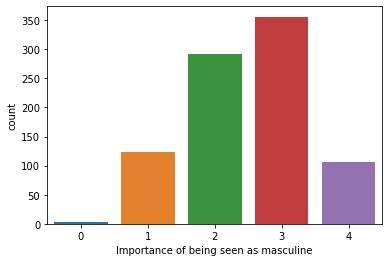

In [63]:
sns.countplot(x='Importance of being seen as masculine',data=df2)
ax.set_title("Importance of being seen as masculine")



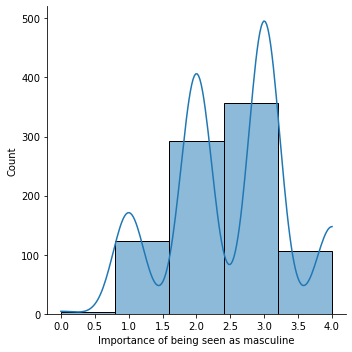

In [24]:
sns.displot(x = 'Importance of being seen as masculine',kde=True,bins = 5 , data =df2)

### **Graph analysis** 

Participants were asked to rate how much they considered important to been seen as masculine from an outsiders perspective . Based on the graphs above , in a scale of 1 to 4 - 1 being "Not important at all" and 4 being "Very important", 40% of men  surveyed rated as a  3 "Somewhat important " , while 33% rated as 2 "Not too important" . 12% chose very important while 13.9% chose not important at all .  It is possible to conclude that most men do  take into account  the perception of others into maintaining what they consider to be an image of masculinity. 


---

In [96]:
load_and_process("https://raw.githubusercontent.com/fivethirtyeight/data/master/masculinity-survey/raw-responses.csv")
df2.copy().reset_index()
df3 = df2.melt(id_vars='index',
        value_vars =['Men are taken more seriously',
                         'Men make more money' , 'Men have more choice',
                    'Men have more promotion/professional development opportunities' ,'Men are explicitly praised more often',
                    'Men have more support from their managers','None of the Above' , 'Other'])

In [97]:
def Selected(x): 
    if x["value"]== "Not selected":
        return "False"
    else : 
        return "True"

In [98]:
df3['Selected']= df3.apply(lambda x: Selected(x) , axis = 'columns') 

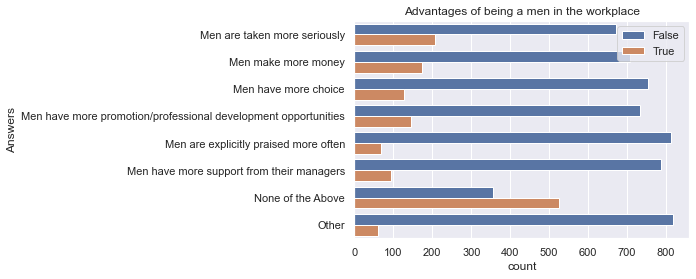

In [102]:
ax=sns.countplot(data=df3,y='variable',hue='Selected')
ax.legend('')
ax.set_title('Advantages of being a men in the workplace')
ax.set_ylabel('Answers')
ax.legend()

### **Graph analysis**

Participants in the survey were asked to choose an advantage(s), if any , of being a men in the job market . "False" is the most frequent answer as participants had to choose between selecting the validity of each one of the choices given . In other words, when asked if "Men make more money ? " , participants chose "False"; "Men are explicitly praised more often" men rated as a false statement, most participants chose to select statements as false for  any of the possible advantages presented . "None of the Above" is , consequently , the most frequent choice for "True". Majority of men in the survey do not recognize any advantage of being a men in the work environment. 

---

In [103]:
load_and_processing("https://raw.githubusercontent.com/fivethirtyeight/data/master/masculinity-survey/raw-responses.cs")
df11.copy().reset_index()
df113 = df11_2.melt(id_vars='index',
        value_vars =['Managers want to hire and promote women','Greater risk of being accused of sexual harassment',
                     'Greater risk of being accused of being sexist or racist', 'None of the Above', 'Other'])


In [104]:
def Selected(x): 
    if x["value"]== "Not selected":
        return "False"
    else : 
        return "True"

In [105]:
df113['Selected']= df113.apply(lambda x: Selected(x) , axis = 'columns') 

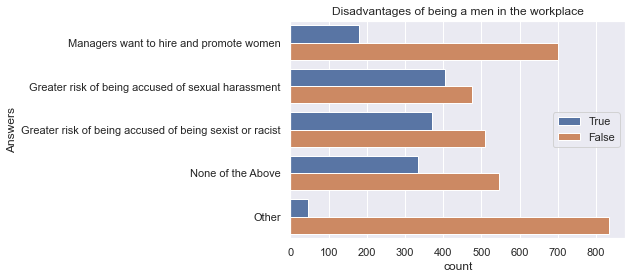

In [107]:
ax=sns.countplot(data=df113,y='variable',hue='Selected')
ax.legend('')
ax.set_title('Disadvantages of being a men in the workplace')
ax.set_ylabel('Answers')
ax.legend()

### **Graph analysis**

While in this graph the most frequent answer is still "False" , when comparing to our previous graph of advantages , options such as "Greater risk of being accused of sexual harassment" and "Greater risk of being accused of being sexist or racist" are more likely to be rated as "True" . 
**Men in the survey were more likely to consider and cite  disadvantages rather than the advantages of being a men in the workplace** 

/Users/marina.selber/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='value', ylabel='count'>

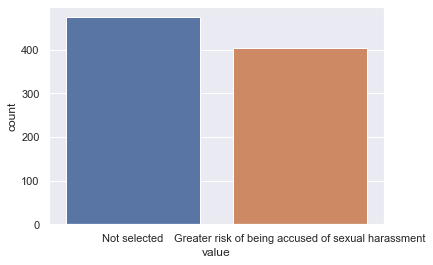

In [108]:
sns.countplot(df113[df113['variable']=='Greater risk of being accused of sexual harassment']['value'])